In [389]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [390]:
from pathlib import Path
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.utils import plot_model


from Models.ARIMA import *
from Models.Helper import *
from Data.Raw import *
from Models.MLP import *
from Models.Hybrid import *



In [391]:
IBBmonth = Path.cwd() / "data" / "IBBmonth.csv"

# 10 year ETFs
IBB = Path.cwd() / "data" / "IBB.csv"
ICLN = Path.cwd() / "data" / "ICLN.csv"
IYW = Path.cwd() / "data" / "IYW.csv"

# 5 year ETFs
ARKK = Path.cwd() / "data" / "ARKK.csv"
ARKW = Path.cwd() / "data" / "ARKW.csv"

# 1 year ETFs
ARKG = Path.cwd() / "data" / "ARKG.csv"
ARKQ = Path.cwd() / "data" / "ARKQ.csv"
ARKF = Path.cwd() / "data" / "ARKF.csv"





data_close = load_data(IBBmonth)

In [392]:
len(data_close)

274

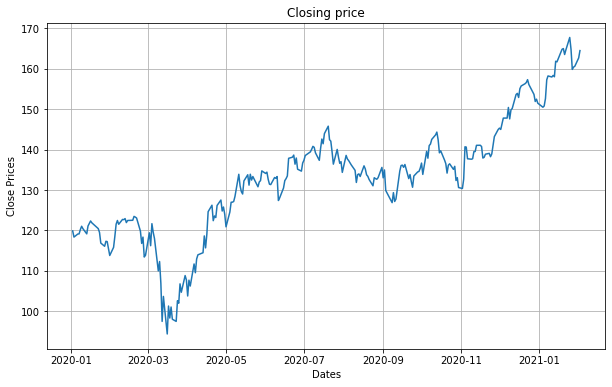

In [393]:
#Plot of closing prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data_close['Close'])
plt.title('Closing price')
plt.show()

Number of values above 0.9 autocorrelation is:  6


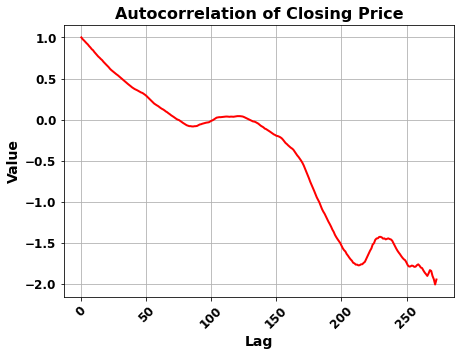

In [394]:
input_dim = find_input_dim(data_close['Close'])

In [395]:
#Split dataset

data_copy = data_close.copy()

train_data, test_data = train_test_split(data_copy.iloc[input_dim:], test_size=0.10, shuffle = False)

print(train_data)

                 Close
Date                  
2020-01-10  120.449997
2020-01-13  119.160004
2020-01-14  121.110001
2020-01-15  121.730003
2020-01-16  122.349998
...                ...
2020-12-16  152.899994
2020-12-17  155.089996
2020-12-18  155.750000
2020-12-21  156.300003
2020-12-22  156.600006

[241 rows x 1 columns]


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1135.347, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1122.794, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1125.811, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1134.180, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1122.079, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1123.938, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1124.009, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1122.957, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1116.590, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1116.405, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1125.132, Time=0.05 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1116.568, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1112.789, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1110.902, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept

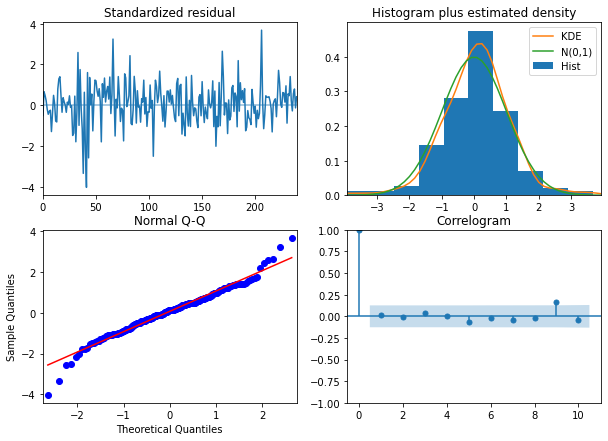

In [396]:
arima_model_order =  auto_arima(train_data,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, seasonal_test='ocsb', test='kpss', error_action='warn',
                          trace = True, supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order.plot_diagnostics(figsize=(10,7))
plt.show()

<Figure size 432x288 with 0 Axes>

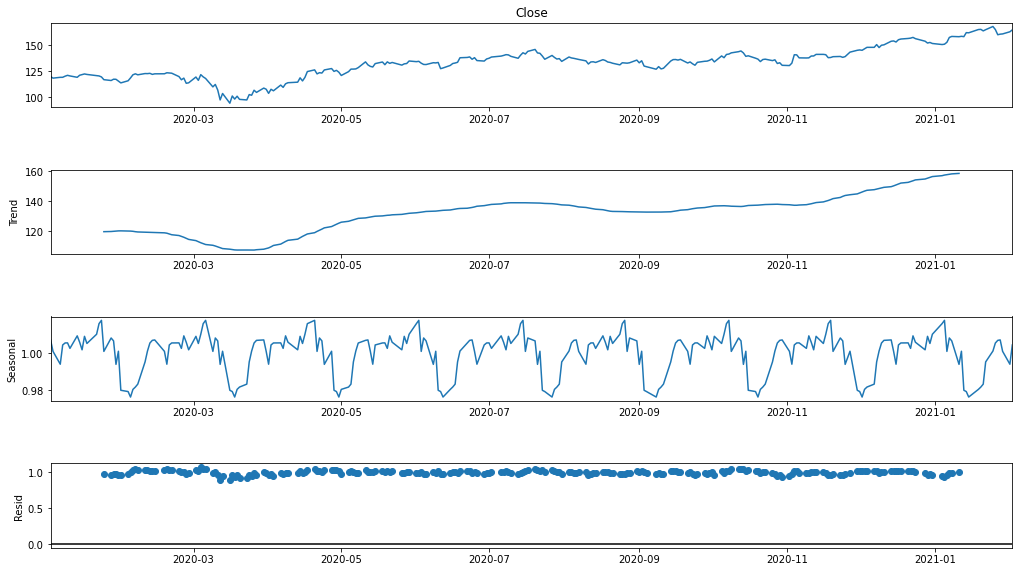

In [397]:
result = seasonal_decompose(data_close['Close'], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  240
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -548.488
Method:                       css-mle   S.D. of innovations              2.376
Date:                Tue, 13 Jul 2021   AIC                           1108.977
Time:                        18:22:02   BIC                           1129.860
Sample:                             1   HQIC                          1117.391
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1524      0.139      1.097      0.273      -0.120       0.425
ar.L1.D.Close    -1.7367      0.053    -33.022      0.000      -1.840      -1.634
ar.L2.D.Close    -0.8843      0.058    -

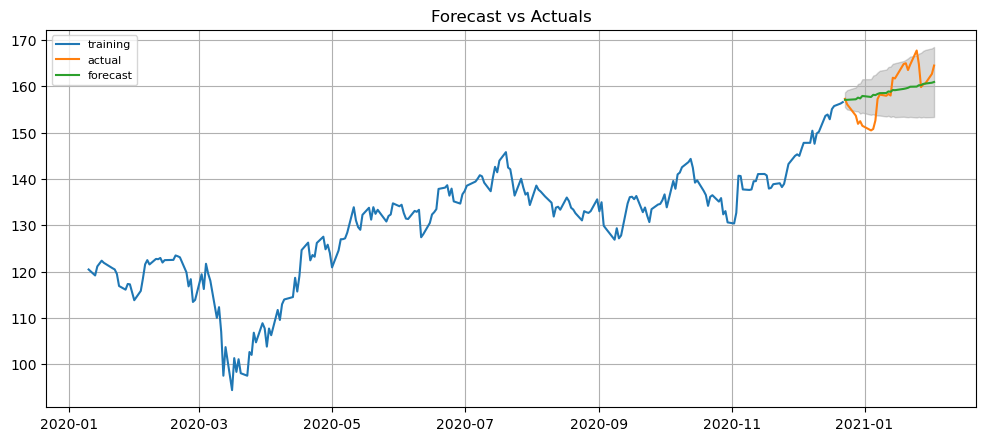

In [398]:
fc, fc_series = ARIMA_pred(train_data, test_data, arima_model_order.order)

In [399]:
print("Error measures for ARIMA:")
calculate_error_measures(test_data, fc)

Error measures for ARIMA:
Mean Squared Error:  16.965522863533128
Mean Absolute Error:  3.2662598125290163
R-squared Score: 0.319


[16.965522863533128, 3.2662598125290163, 0.3190403499228712]

In [400]:
list_of_attributes = ['Close']

list_of_prev_t_instants = []
for i in range(1, input_dim+1):
    list_of_prev_t_instants.append(i)

df_new = create_regressor_attributes(data_close, list_of_attributes, list_of_prev_t_instants)

df_new.shape

(268, 7)

In [401]:
df_new.head()

,Close,Close_(t-1),Close_(t-2),Close_(t-3),Close_(t-4),Close_(t-5),Close_(t-6)
datetime,,,,,,,
2020-01-10,120.449997,121.040001,120.220001,119.150002,119.120003,118.360001,119.889999
2020-01-13,119.160004,120.449997,121.040001,120.220001,119.150002,119.120003,118.360001
2020-01-14,121.110001,119.160004,120.449997,121.040001,120.220001,119.150002,119.120003
2020-01-15,121.730003,121.110001,119.160004,120.449997,121.040001,120.220001,119.150002
2020-01-16,122.349998,121.730003,121.110001,119.160004,120.449997,121.040001,120.220001


In [402]:
X_train, y_train, X_valid, y_valid, X_test, y_test = create_train_valid_test(df_new, 0.10, 0.05)


Shape of training inputs, training target: (228, 6) (228,)
Shape of validation inputs, validation target: (13, 6) (13,)
Shape of test inputs, test target: (27, 6) (27,)


In [403]:
scaler = MinMaxScaler()

X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled = scale_data(
    X_train, y_train, X_valid, y_valid, X_test, y_test, scaler)


In [404]:
y_test_rescaled = scaler.inverse_transform(y_test_scaled)


[INFO] training model...


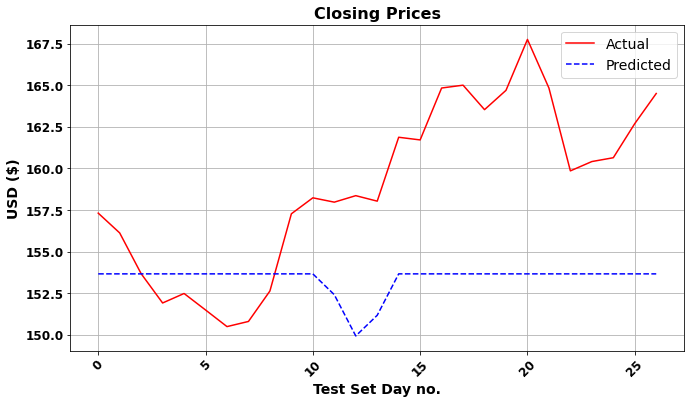

Mean Squared Error:  55.2044359327006
Mean Absolute Error:  6.371780980830438
R-squared Score: -1.2158
[INFO] training model...


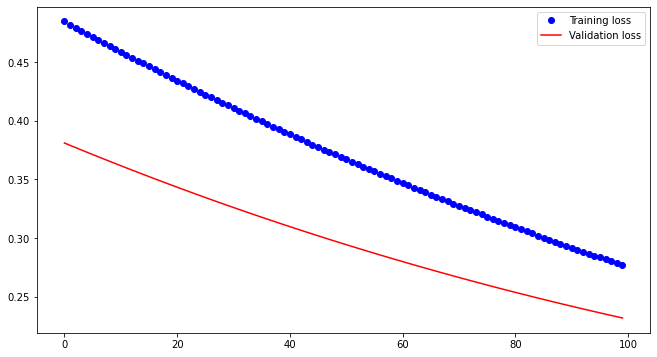

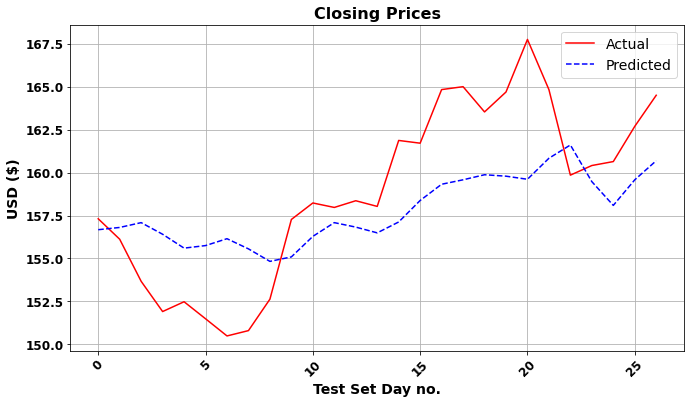

Mean Squared Error:  14.145696999614858
Mean Absolute Error:  3.3034815395688657
R-squared Score: 0.4322
[INFO] training model...


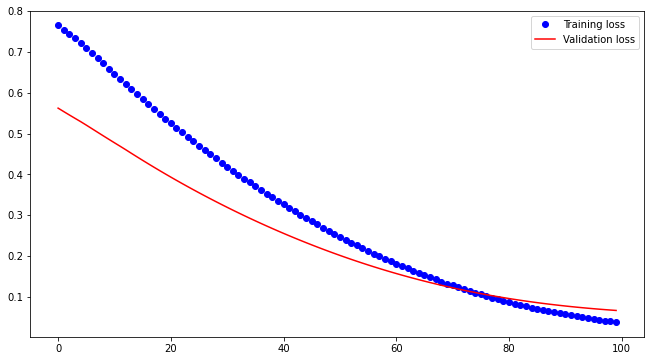

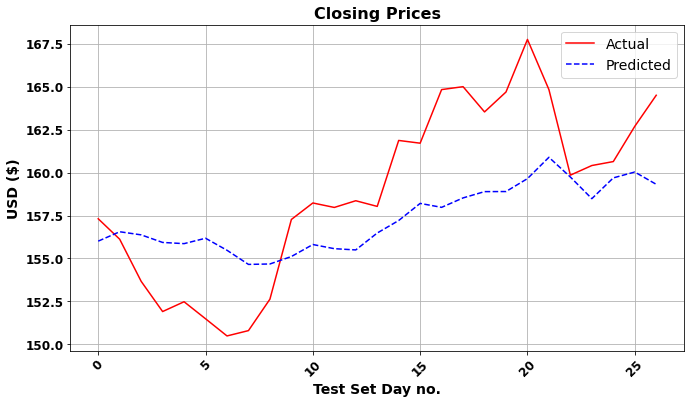

Mean Squared Error:  15.827711911928603
Mean Absolute Error:  3.467226423032408
R-squared Score: 0.3647
[INFO] training model...


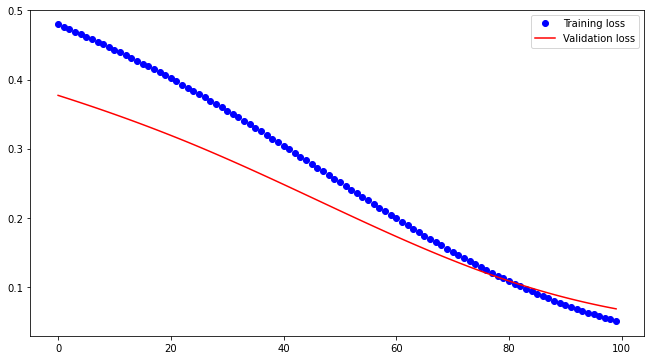

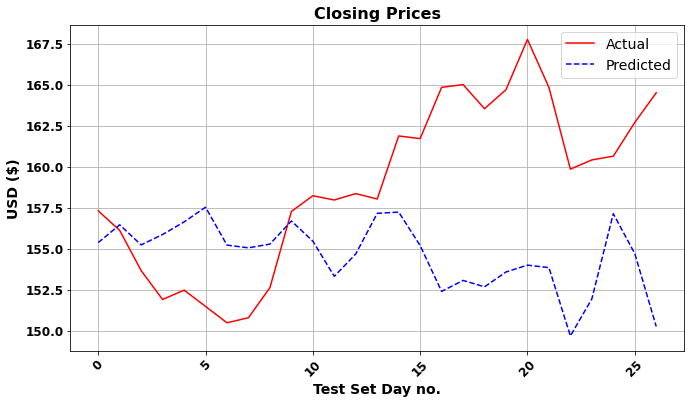

Mean Squared Error:  56.72813192257954
Mean Absolute Error:  6.248371306929977
R-squared Score: -1.2769
[INFO] training model...


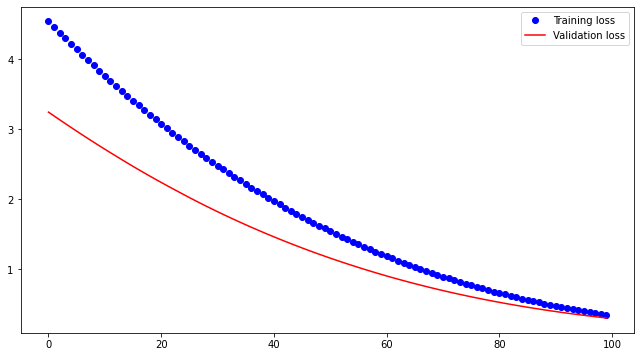

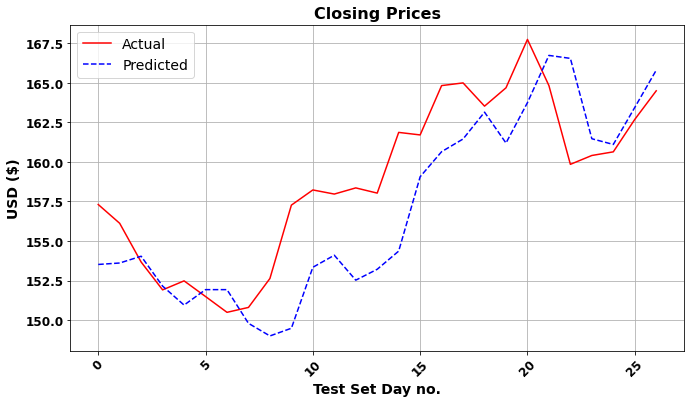

Mean Squared Error:  13.71895635495724
Mean Absolute Error:  2.9666760243778976
R-squared Score: 0.4494
[INFO] training model...


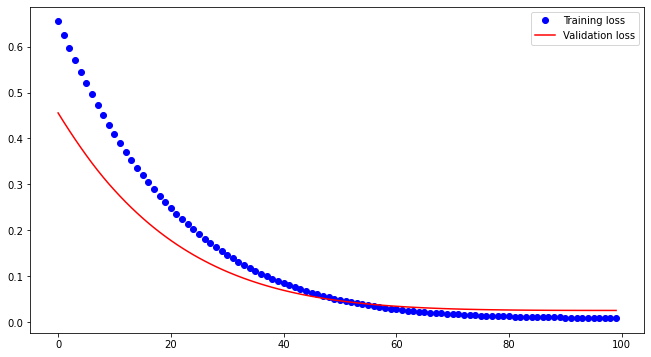

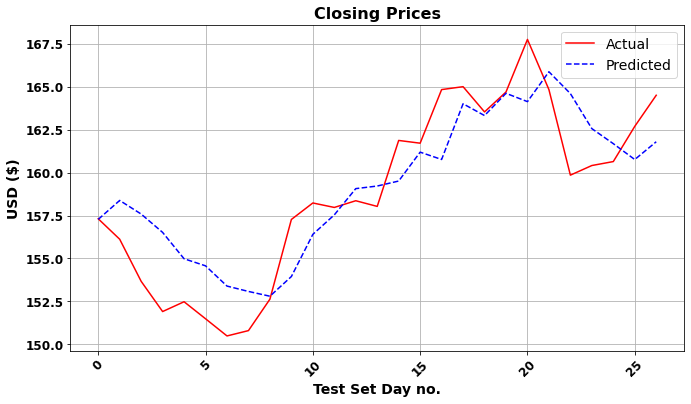

Mean Squared Error:  6.091253315576351
Mean Absolute Error:  2.025924677770544
R-squared Score: 0.7555
[INFO] training model...


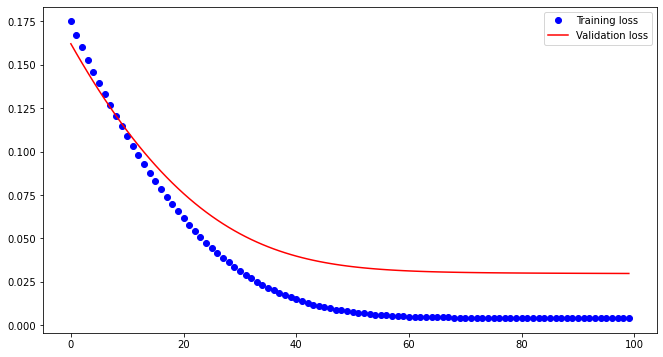

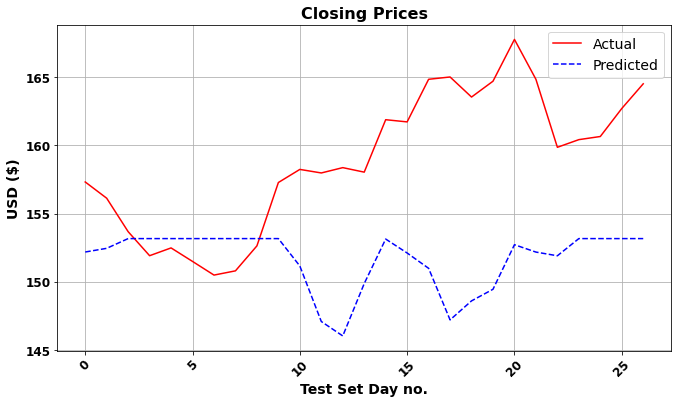

Mean Squared Error:  87.80417500047312
Mean Absolute Error:  7.866876127857348
R-squared Score: -2.5243
[INFO] training model...


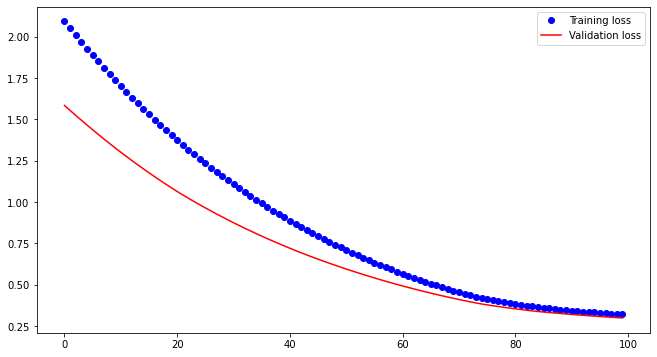

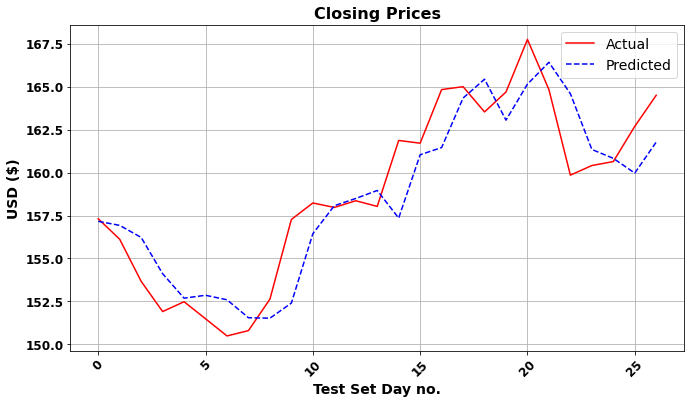

Mean Squared Error:  4.98136731867941
Mean Absolute Error:  1.7533750219184034
R-squared Score: 0.8001
[INFO] training model...


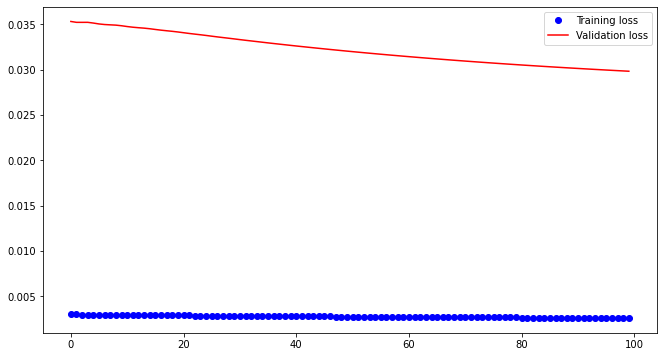

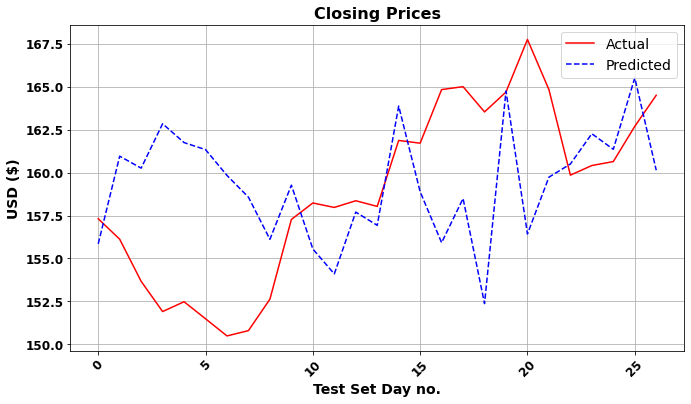

Mean Squared Error:  37.13060101099499
Mean Absolute Error:  4.892743858253765
R-squared Score: -0.4903
[INFO] training model...


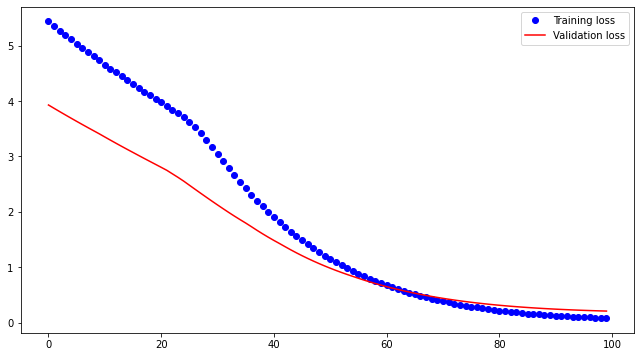

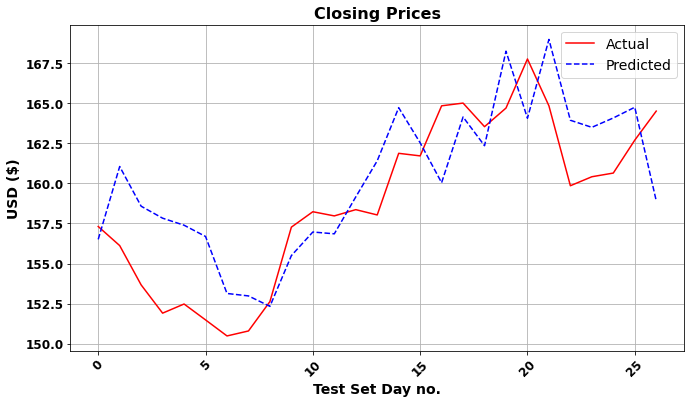

Mean Squared Error:  11.684983926870974
Mean Absolute Error:  2.9707896481843203
R-squared Score: 0.531


(30.331731369437573, 4.186724560872397, -0.21745055225868035)

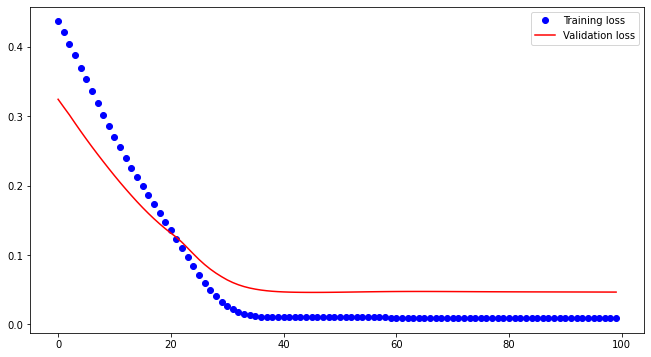

In [405]:
baseline_test(10, input_dim, X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_rescaled, scaler)

In [406]:
# wrap model into a scikit-learn compatible regressor
model = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)
# define a grid of the hyperparameter search space
hidden_layer_one = [25, 50, 100]
hidden_layer_two = [5, 10, 25]
learn_rate = [0.01, 0.001, 0.0001]
dropout = [0.1, 0.2 , 0.3, 0.4, 0.5]
batch_size = [4, 8, 16, 32, 64, 128]
epochs = [10, 50, 100, 500, 1000]
# create a dictionary from the hyperparameter grid
grid = dict(
    hidden_layer_one=hidden_layer_one,
    hidden_layer_two=hidden_layer_two,
    dropout=dropout,
    learn_rate=learn_rate,
    batch_size=batch_size,
    epochs=epochs
)


[INFO] performing random search...
[INFO] best score is -0.00 using {'learn_rate': 0.001, 'hidden_layer_two': 25, 'hidden_layer_one': 100, 'epochs': 50, 'dropout': 0.1, 'batch_size': 128}
[INFO] training model...
Epoch 1/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5063 - mse: 0.5063 - mae: 0.6760 - val_loss: 0.3291 - val_mse: 0.3291 - val_mae: 0.4706
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3803 - mse: 0.3803 - mae: 0.5841 - val_loss: 0.2504 - val_mse: 0.2504 - val_mae: 0.4099
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 0.2927 - mse: 0.2927 - mae: 0.5102 - val_loss: 0.1879 - val_mse: 0.1879 - val_mae: 0.3592
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2133 - mse: 0.2133 - mae: 0.4311 - val_loss: 0.1393 - val_mse: 0.1393 - val_mae: 0.3120
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 0.1535 - mse: 0.1535 - mae: 0.3600 - val_loss: 0.1026 - val_mse: 0.1026 - va

2/2 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0917 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1225


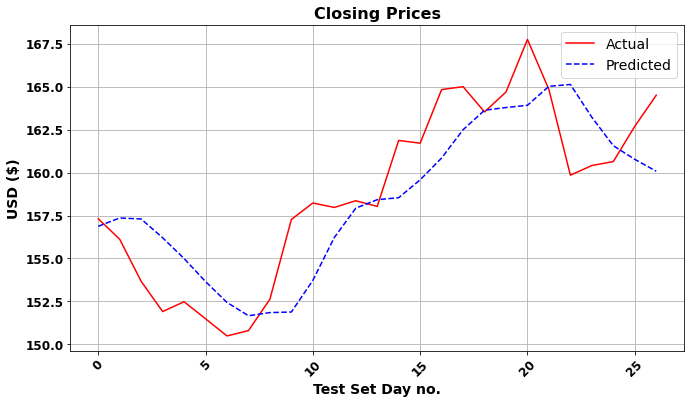

Mean Squared Error:  7.9789115399903
Mean Absolute Error:  2.3212879485677096
R-squared Score: 0.6797


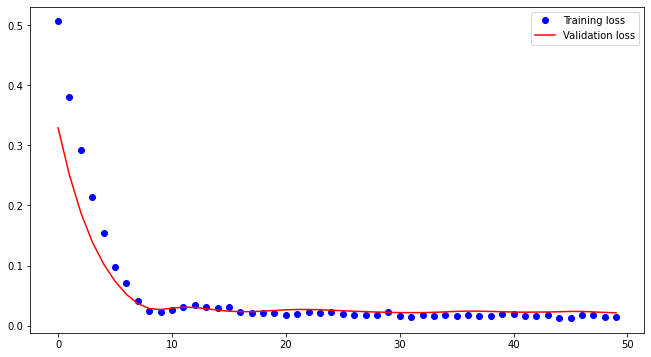

In [407]:
best_parameters = optimize_parameters(model, grid, X_train_scaled, y_train_scaled)


hidden_layer_one=best_parameters['hidden_layer_one']
hidden_layer_two=best_parameters['hidden_layer_two']
dropout=best_parameters['dropout']
learn_rate=best_parameters['learn_rate']
batch_size=best_parameters['batch_size']
epochs=best_parameters['epochs']


best_model = get_mlp_model(input_dim, hidden_layer_one=hidden_layer_one, hidden_layer_two=hidden_layer_two,
    dropout=dropout, learn_rate=learn_rate)

print("[INFO] training model...")
history = best_model.fit(x=X_train_scaled, y=y_train_scaled,
    validation_data=(X_valid_scaled, y_valid_scaled),
    batch_size=batch_size,
    epochs=epochs, shuffle=False)

MLP_pred = best_model.predict(X_test_scaled)
MLP_pred_rescaled = scaler.inverse_transform(MLP_pred)




plot_comparison_graph(y_test_rescaled, MLP_pred_rescaled)
plot_loss(history)
measures = calculate_error_measures(y_test_rescaled, MLP_pred_rescaled)

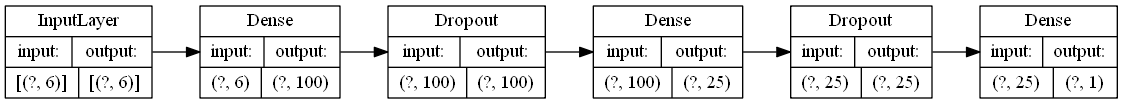

In [408]:
plot_model(best_model,
    to_file="Reports/MLP.png",
    show_shapes=True,
    show_layer_names=False,
    rankdir="LR",
    expand_nested=True,
    dpi=96)

Weight for ARIMA:  0.4154394821874572
Weight for MLP:  0.5845605178125428


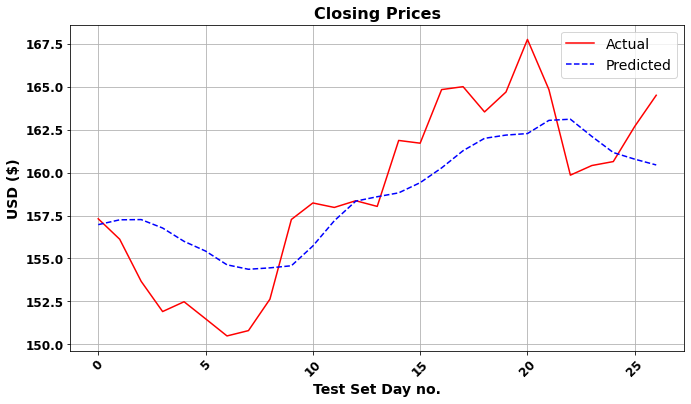

Mean Squared Error:  8.834214515059378
Mean Absolute Error:  2.5879454801432304
R-squared Score: 0.6454


[8.834214515059378, 2.5879454801432304, 0.6454136030306628]

In [409]:
weighted_ensemble = weighted_average(fc, MLP_pred_rescaled, y_test_rescaled)

plot_comparison_graph(y_test_rescaled, weighted_ensemble)
calculate_error_measures(y_test_rescaled, weighted_ensemble)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1276.106, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1265.652, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1267.933, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1275.282, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1265.141, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1267.137, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1267.139, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1265.841, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1269.141, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1264.630, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1265.447, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1266.608, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1266.619, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1265.506, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]          

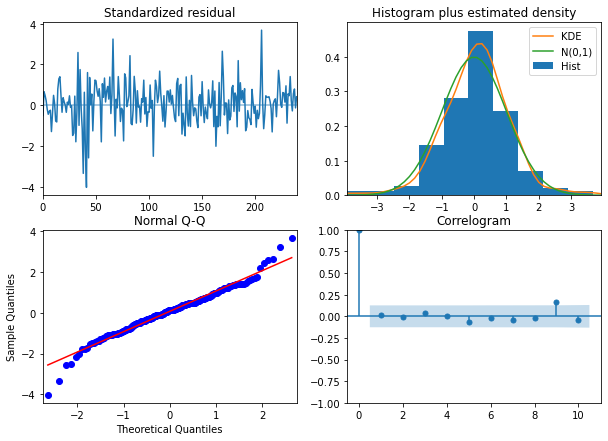

In [410]:
arima_model_order2 =  auto_arima(data_close['Close'],start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, seasonal_test='ocsb', test='kpss', error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order.plot_diagnostics(figsize=(10,7))
plt.show()

In [411]:
model = ARIMA(data_close['Close'], order=arima_model_order2.order)  
fitted = model.fit()  
print(fitted.summary())

residuals = fitted.resid

resid = pd.DataFrame({'resid':residuals})

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  273
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -619.076
Method:                       css-mle   S.D. of innovations              2.335
Date:                Tue, 13 Jul 2021   AIC                           1250.152
Time:                        18:23:00   BIC                           1271.809
Sample:                             1   HQIC                          1258.845
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1636      0.129      1.265      0.206      -0.090       0.417
ar.L1.D.Close    -1.7425      0.050    -34.882      0.000      -1.840      -1.645
ar.L2.D.Close    -0.8869      0.053    -

C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [412]:
list_of_attributes = ['resid']

list_of_prev_t_instants = []
for i in range(1, input_dim+1):
    list_of_prev_t_instants.append(i)

df_new2 = create_regressor_attributes(resid, list_of_attributes, list_of_prev_t_instants)

In [413]:
X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble = create_train_valid_test(df_new2, 0.10, 0.05)

Shape of training inputs, training target: (228, 6) (228,)
Shape of validation inputs, validation target: (12, 6) (12,)
Shape of test inputs, test target: (27, 6) (27,)


In [414]:
#
## define model
model = Sequential()
model.add(Dense(input_dim, activation='relu', input_dim=input_dim))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

model.summary()

history2 = model.fit(X_train_ensemble, y_train_ensemble, 
    batch_size=16,
    epochs=100)

pred_test2 = model.predict(X_test_ensemble)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 0s 333us/step - loss: 12.5568 - mse: 12.5568 - mae: 2.6941
Epoch 2/100
15/15 [==============================] - 0s 333us/step - loss: 10.9579 - mse: 10.9579 - mae: 2.5161
Epoch 3/100
15/15 [==============================] - 0s 333us/step - loss: 9.9170 - mse: 9.9170 - mae: 2.3813
Epoch 4/100
15/15 [==============================] - 0

15/15 [==============================] - 0s 400us/step - loss: 5.4601 - mse: 5.4601 - mae: 1.7421
Epoch 66/100
15/15 [==============================] - 0s 333us/step - loss: 5.4639 - mse: 5.4639 - mae: 1.7435
Epoch 67/100
15/15 [==============================] - 0s 333us/step - loss: 5.4519 - mse: 5.4519 - mae: 1.7416
Epoch 68/100
15/15 [==============================] - 0s 333us/step - loss: 5.4521 - mse: 5.4521 - mae: 1.7419
Epoch 69/100
15/15 [==============================] - 0s 333us/step - loss: 5.4453 - mse: 5.4453 - mae: 1.7411
Epoch 70/100
15/15 [==============================] - 0s 267us/step - loss: 5.4437 - mse: 5.4437 - mae: 1.7414
Epoch 71/100
15/15 [==============================] - 0s 333us/step - loss: 5.4421 - mse: 5.4421 - mae: 1.7411
Epoch 72/100
15/15 [==============================] - 0s 333us/step - loss: 5.4403 - mse: 5.4403 - mae: 1.7410
Epoch 73/100
15/15 [==============================] - 0s 267us/step - loss: 5.4378 - mse: 5.4378 - mae: 1.7404
Epoch 74/100
1

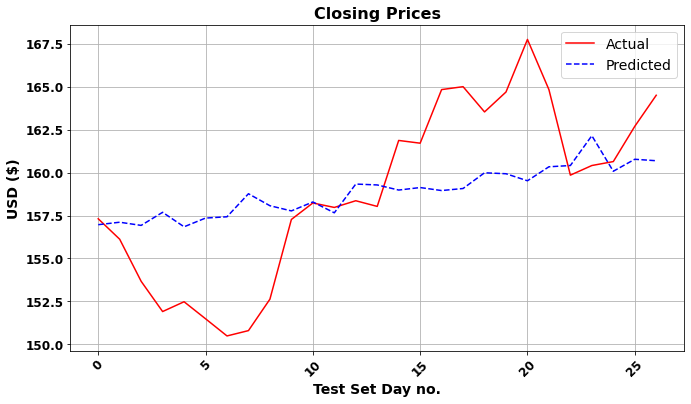

Mean Squared Error:  17.48451586775427
Mean Absolute Error:  3.3668710002170137
R-squared Score: 0.2982


[17.48451586775427, 3.3668710002170137, 0.2982090853995387]

In [415]:
#pred_test2 = scaler.inverse_transform(pred_test2)

comb = [sum(x) for x in zip(fc, pred_test2)]

plot_comparison_graph(y_test_rescaled, comb)

#comb = comb[:-1]
#y_test_rescaled = y_test_rescaled[:-1]

calculate_error_measures(y_test_rescaled, comb)
